In [1]:
import torch
from kan import *
torch.set_default_dtype(torch.float64)

In [2]:
model=KAN(width=[2,5,1],grid=20,seed=0)
f = lambda x: torch.exp(torch.special.bessel_j0(20*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f)

In [3]:
model.train(dataset=dataset,steps=20,lamb=0.01,lamb_entropy=10.)

train loss: 1.18e-01 | test loss: 1.16e-01 | reg: 2.81e+01 : 100%|██| 20/20 [00:07<00:00,  2.75it/s]


{'train_loss': [array(0.20321323),
  array(0.1689276),
  array(0.16530956),
  array(0.16136101),
  array(0.15958665),
  array(0.14904478),
  array(0.12595618),
  array(0.11530815),
  array(0.10469037),
  array(0.09580019),
  array(0.13629087),
  array(0.12700185),
  array(0.11649221),
  array(0.1133689),
  array(0.11224391),
  array(0.12772748),
  array(0.12327167),
  array(0.12228185),
  array(0.12045997),
  array(0.11805304)],
 'test_loss': [array(0.1961602),
  array(0.16230618),
  array(0.1606022),
  array(0.1560491),
  array(0.15338079),
  array(0.14127914),
  array(0.12869169),
  array(0.12332128),
  array(0.11265847),
  array(0.10968116),
  array(0.13769844),
  array(0.12811424),
  array(0.11675649),
  array(0.11233904),
  array(0.11040691),
  array(0.12451149),
  array(0.12026643),
  array(0.1191737),
  array(0.11766171),
  array(0.11551428)],
 'reg': [array(34.81988661),
  array(28.87759712),
  array(27.42039374),
  array(26.49474836),
  array(26.10249058),
  array(32.87809442)

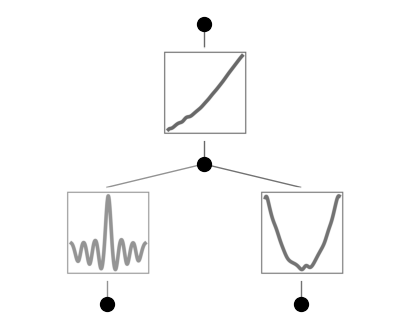

In [4]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [5]:
model.suggest_symbolic(0,0,0)

function , r2
gaussian , 0.6716852909672358
1/x^2 , 0.20192939773807117
sin , 0.14543473672203597
tan , 0.10103895520642878
1/x , 0.10046092690046349


('gaussian',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.6716852909672358)

In [8]:
SYMBOLIC_LIB.keys()

dict_keys(['x', 'x^2', 'x^3', 'x^4', '1/x', '1/x^2', '1/x^3', '1/x^4', 'sqrt', '1/sqrt(x)', 'exp', 'log', 'abs', 'sin', 'tan', 'tanh', 'sigmoid', 'sgn', 'arcsin', 'arctan', 'arctanh', '0', 'gaussian', 'cosh', 'J0'])

In [7]:
add_symbolic('J0', torch.special.bessel_j0)

In [9]:
model.suggest_symbolic(0,0,0)

function , r2
gaussian , 0.6716852909672358
J0 , 0.2350160769859418
1/x^2 , 0.20192939773807117
sin , 0.14543473672203597
tan , 0.10103895520642878


('gaussian',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.6716852909672358)

在这里，刚刚添加的贝赛尔函数J0出现了，但是r2却不是最高的，是因为取值范围太小。

In [10]:
model.suggest_symbolic(0,0,0,a_range=(-40,40))

function , r2
J0 , 0.9860805578479026
gaussian , 0.7185500209852408
sin , 0.5094847968782872
1/x^2 , 0.20192939787707243
tan , 0.10148900113882624


('J0',
 (<function torch._C._special.special_bessel_j0>, J0),
 0.9860805578479026)

In [11]:
model.train(dataset=dataset,steps=20)

train loss: 1.67e-02 | test loss: 1.80e-02 | reg: 2.56e+00 : 100%|██| 20/20 [00:02<00:00,  9.58it/s]


{'train_loss': [array(0.03104805),
  array(0.02132414),
  array(0.01878495),
  array(0.01780281),
  array(0.01754198),
  array(0.01716229),
  array(0.01694062),
  array(0.0168531),
  array(0.01679216),
  array(0.01677411),
  array(0.01672057),
  array(0.01669446),
  array(0.01667584),
  array(0.0166708),
  array(0.01666585),
  array(0.01667669),
  array(0.01666944),
  array(0.01666595),
  array(0.01666485),
  array(0.01666346)],
 'test_loss': [array(0.03487228),
  array(0.02309272),
  array(0.02060162),
  array(0.01982789),
  array(0.01923946),
  array(0.01854725),
  array(0.01804657),
  array(0.01802074),
  array(0.01785132),
  array(0.01781651),
  array(0.01786589),
  array(0.01795797),
  array(0.01794504),
  array(0.01798704),
  array(0.01801149),
  array(0.01795496),
  array(0.01797876),
  array(0.01802117),
  array(0.01800257),
  array(0.01804134)],
 'reg': [array(2.58767633),
  array(2.57015014),
  array(2.55927142),
  array(2.55271804),
  array(2.54955708),
  array(2.58106966),


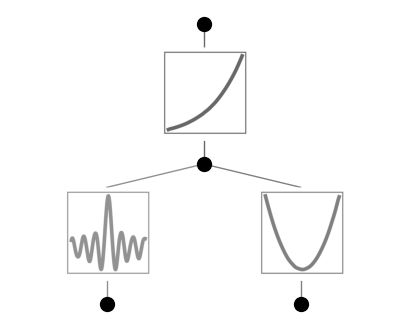

In [12]:
model.plot()

In [13]:
model.fix_symbolic(0,0,0,'J0',a_range=(-40,40))

r2 is 0.9985527684777082


tensor(0.9986)

In [14]:
model.auto_symbolic()

skipping (0,0,0) since already symbolic
fixing (0,1,0) with x^2, r2=0.9999813512109327
fixing (1,0,0) with tanh, r2=0.9999669515157107


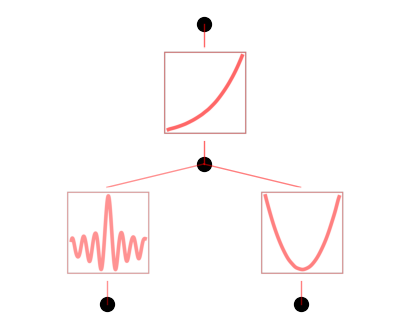

In [15]:
model.plot()

In [17]:
model.train(dataset=dataset,steps=20)

train loss: 8.68e-04 | test loss: 9.11e-04 | reg: 2.56e+00 : 100%|██| 20/20 [00:02<00:00,  9.76it/s]


{'train_loss': [array(0.0048723),
  array(0.00357767),
  array(0.00262222),
  array(0.00197705),
  array(0.00171378),
  array(0.00127158),
  array(0.00104848),
  array(0.00098607),
  array(0.00094502),
  array(0.00093813),
  array(0.00093093),
  array(0.00092652),
  array(0.00090894),
  array(0.0009085),
  array(0.00090646),
  array(0.00089571),
  array(0.00089303),
  array(0.00088448),
  array(0.00087991),
  array(0.00086794)],
 'test_loss': [array(0.0048818),
  array(0.00352338),
  array(0.00258112),
  array(0.00203929),
  array(0.00171434),
  array(0.00130587),
  array(0.00109744),
  array(0.00101716),
  array(0.00098893),
  array(0.00098149),
  array(0.00097519),
  array(0.00096459),
  array(0.00094566),
  array(0.00094434),
  array(0.0009438),
  array(0.00094036),
  array(0.00093822),
  array(0.00093035),
  array(0.00092183),
  array(0.00091065)],
 'reg': [array(2.55830615),
  array(2.558736),
  array(2.55951704),
  array(2.55969131),
  array(2.55995536),
  array(2.55970432),
  ar

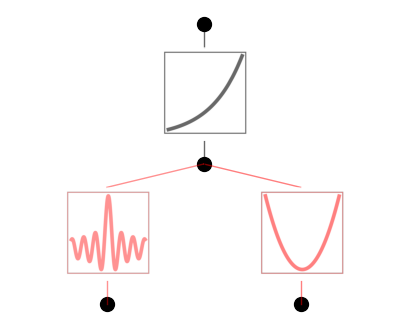

In [18]:
model.plot()

In [19]:
model.suggest_symbolic(1,0,0)

function , r2
exp , 0.9999997545058875
tanh , 0.9999868066579325
sigmoid , 0.9999785700474721
arctan , 0.9999255451363058
gaussian , 0.9998934779816747


('exp',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9999997545058875)

In [20]:
model.fix_symbolic(1,0,0,'exp')

r2 is 0.9999997545058875


tensor(1.0000, grad_fn=<SelectBackward0>)

In [21]:
model.train(dataset=dataset,steps=20)

train loss: 8.11e-04 | test loss: 8.54e-04 | reg: 2.56e+00 : 100%|██| 20/20 [00:00<00:00, 26.79it/s]


{'train_loss': [array(0.00081167),
  array(0.00081106),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093),
  array(0.00081093)],
 'test_loss': [array(0.00085109),
  array(0.00085493),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539),
  array(0.0008539)],
 'reg': [array(2.55977161),
  array(2.55978057),
  array(2.55979142),
  array(2.55979142),
  array(2.55979142),
  array(2.55980483),
  array(2.559804

In [22]:
formula=model.symbolic_formula()[0][0]
formula

1.0*exp(1.0*x_2**2 + 1.0*J0(20.0*x_1))